In [19]:
import warnings
from pytrends.request import TrendReq
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
pytrends = TrendReq(hl='en-IN', tz=330)

In [22]:
keywords_list = [
    ["Python", "Java", "C++", "JavaScript"],
    ["Data Science", "Machine Learning", "Artificial Intelligence", "Web Development"]
]

In [23]:
combined_data = pd.DataFrame()

In [24]:
for keywords in keywords_list:
    try:
        pytrends.build_payload(kw_list=keywords, geo='IN', timeframe='today 12-m')
        trends_data = pytrends.interest_over_time()
        if not trends_data.empty:
            if 'isPartial' in trends_data.columns:
                trends_data = trends_data.drop(columns=['isPartial'])
            trends_data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
            combined_data = pd.concat([combined_data, trends_data], axis=1)
            print(f"Trends data for {keywords}:")
            print(trends_data.head())
        else:
            print(f"No data found for {keywords}.")
    except Exception as e:
        print(f"An error occurred for {keywords}: {e}")
    time.sleep(5)

Trends data for ['Python', 'Java', 'C++', 'JavaScript']:
            Python  Java  C++  JavaScript
date                                     
2023-10-22      34    31   73          11
2023-10-29      41    38   84          11
2023-11-05      36    34   72          11
2023-11-12      29    29   68           9
2023-11-19      39    37   82          11
Trends data for ['Data Science', 'Machine Learning', 'Artificial Intelligence', 'Web Development']:
            Data Science  Machine Learning  Artificial Intelligence  \
date                                                                  
2023-10-22            55                58                       40   
2023-10-29            65                80                       47   
2023-11-05            56                77                       44   
2023-11-12            53                63                       42   
2023-11-19            66                83                       55   

            Web Development  
date                 

In [25]:
if not combined_data.empty:
    combined_data.to_csv('trends_india.csv')
    print("Data saved to 'trends_india.csv'.")
else:
    print("No data to save.")


Data saved to 'trends_india.csv'.


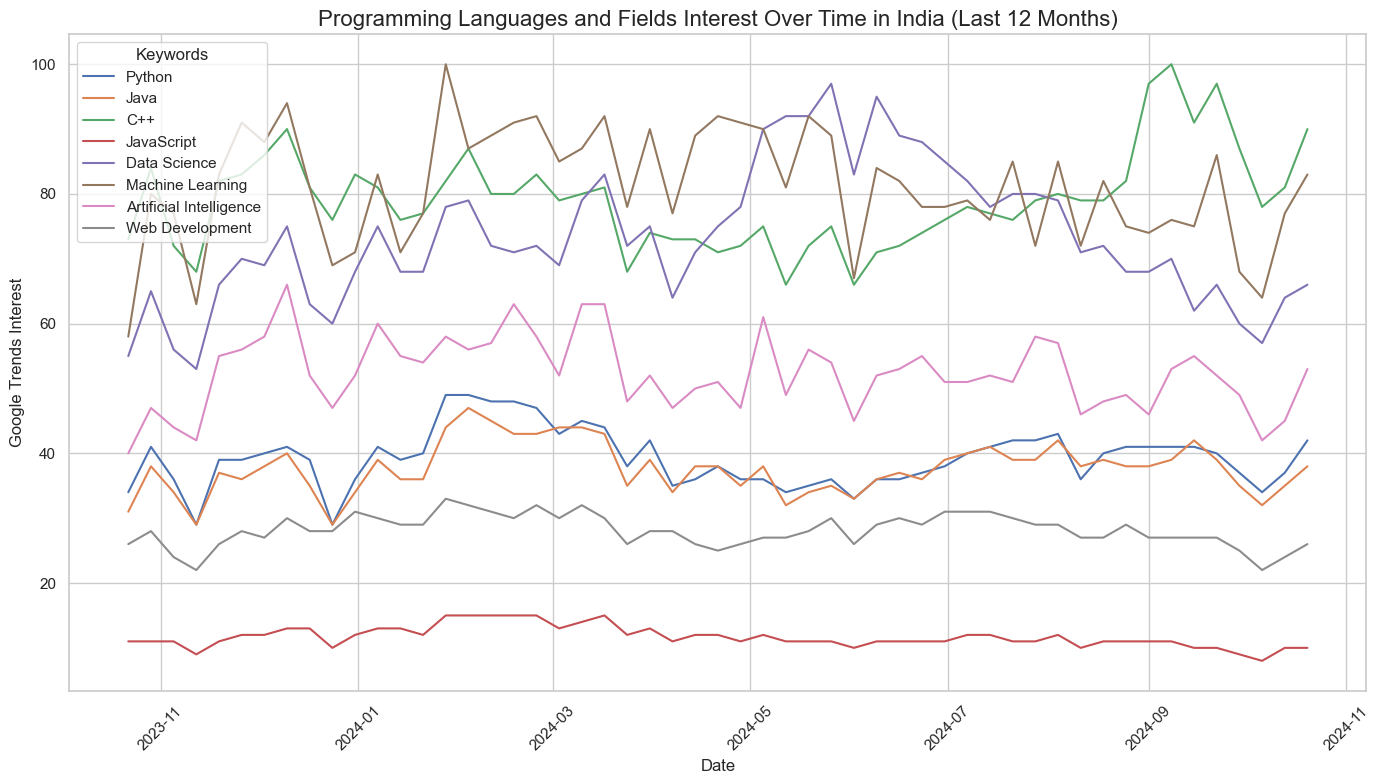

In [26]:
if not combined_data.empty:
    combined_data.reset_index(inplace=True)
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid")
    for keyword in combined_data.columns[1:]: 
        sns.lineplot(x="date", y=keyword, data=combined_data, label=keyword)
    plt.title('Programming Languages and Fields Interest Over Time in India (Last 12 Months)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Google Trends Interest', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Keywords")
    plt.tight_layout()
    plt.show()

else:
    print("No data available for visualization.")

Average Interest Data Types:
object


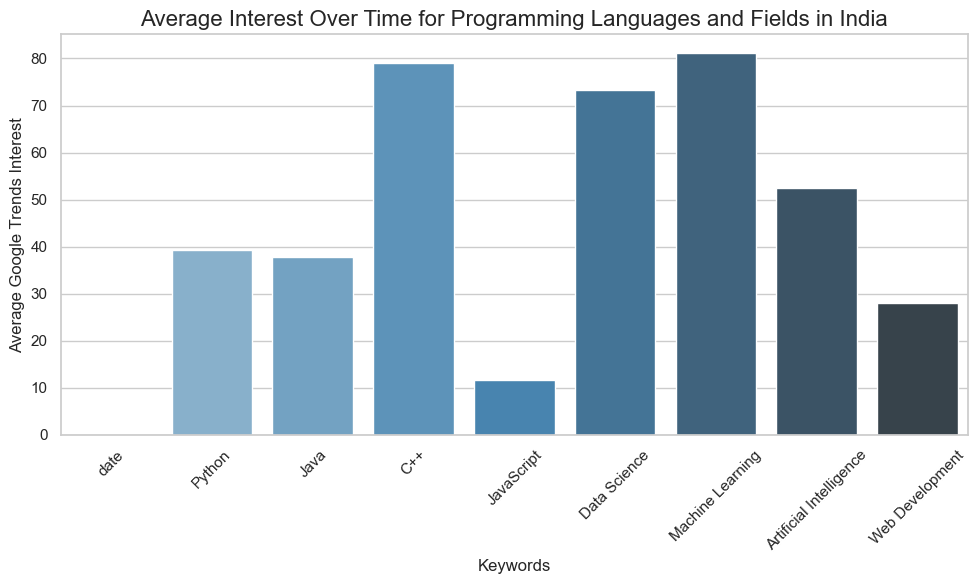

In [35]:
average_interest = combined_data.mean()
print("Average Interest Data Types:")
print(average_interest.dtypes)
average_interest = pd.to_numeric(average_interest, errors='coerce')
plt.figure(figsize=(10, 6))
sns.barplot(x=average_interest.index, y=average_interest.values, palette="Blues_d")
plt.title('Average Interest Over Time for Programming Languages and Fields in India', fontsize=16)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Average Google Trends Interest', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

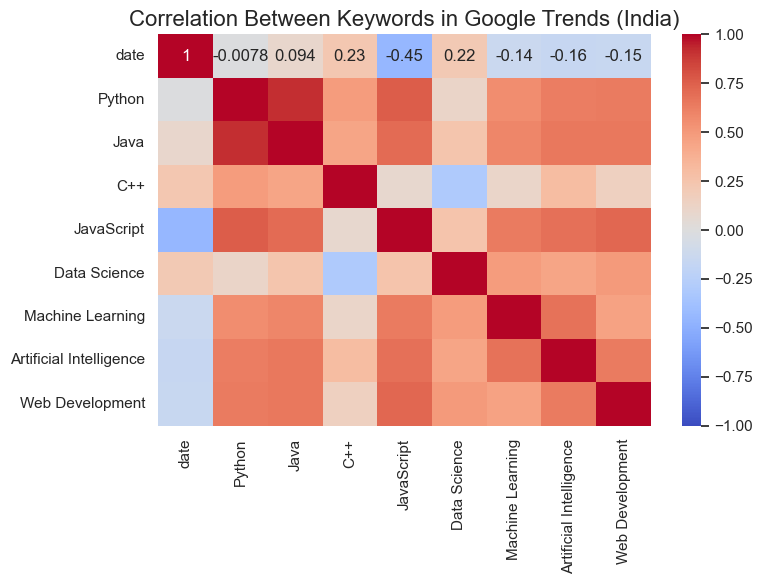

In [36]:
elation_matrix = combined_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Between Keywords in Google Trends (India)', fontsize=16)
plt.tight_layout()
plt.show()


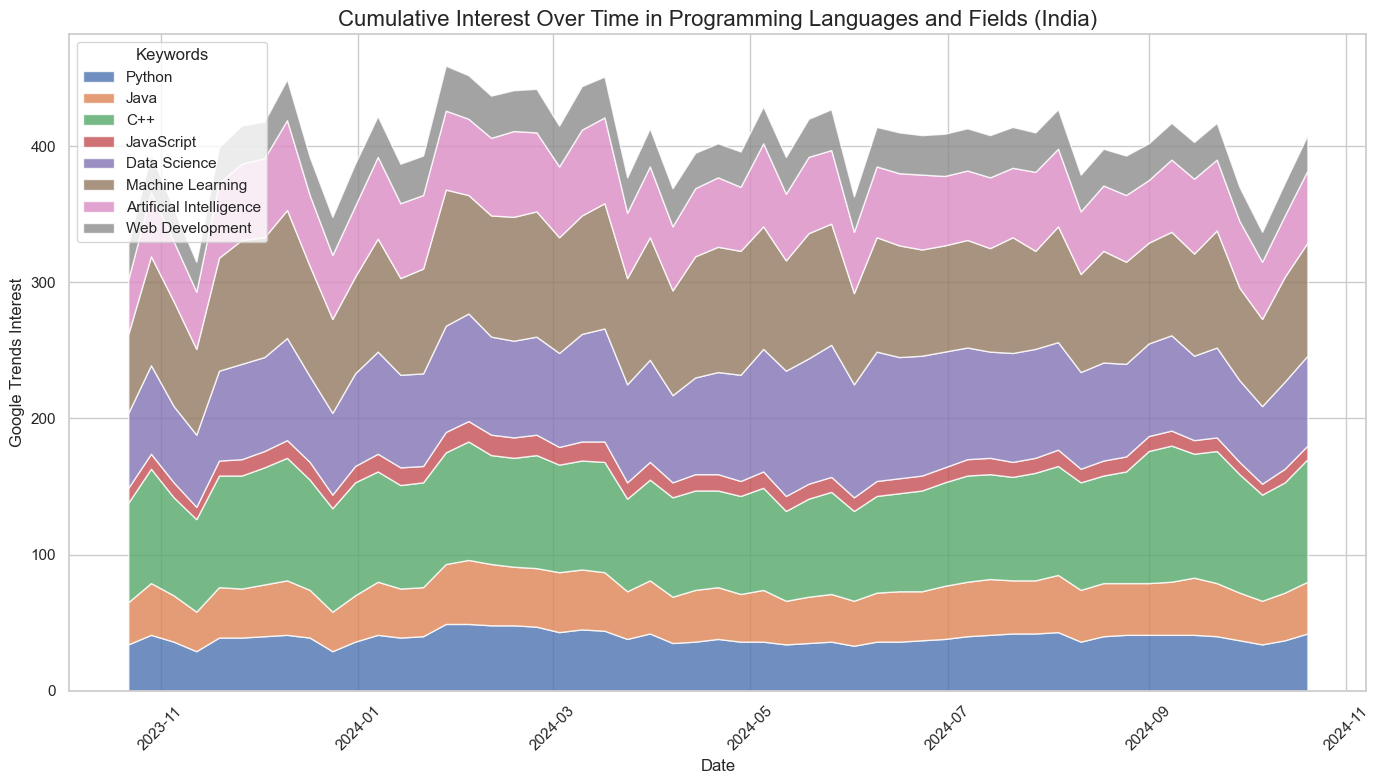

In [37]:
plt.figure(figsize=(14, 8))
plt.stackplot(combined_data['date'], combined_data.drop(columns='date').T, labels=combined_data.columns[1:], alpha=0.8)
plt.title('Cumulative Interest Over Time in Programming Languages and Fields (India)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Google Trends Interest', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', title="Keywords")
plt.tight_layout()
plt.show()

Total Interest for Each Keyword:
Python                     2080
Java                       1998
C++                        4193
JavaScript                  619
Data Science               3883
Machine Learning           4296
Artificial Intelligence    2776
Web Development            1490
dtype: int64


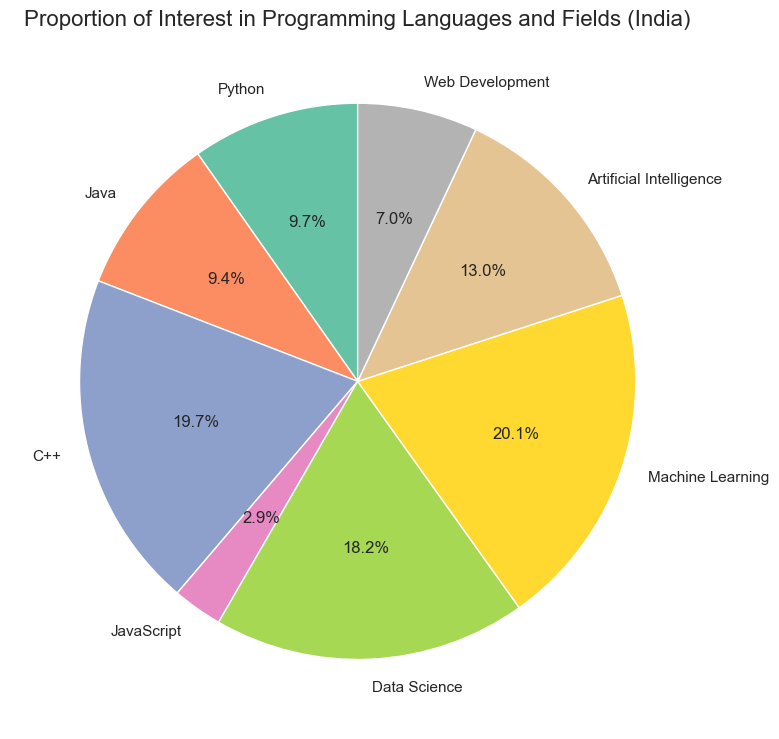

In [38]:
total_interest = combined_data.drop(columns='date').sum()
print("Total Interest for Each Keyword:")
print(total_interest)
plt.figure(figsize=(8, 8))
plt.pie(total_interest, labels=total_interest.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Proportion of Interest in Programming Languages and Fields (India)', fontsize=16)
plt.tight_layout()
plt.show()